In [4]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv",nrows = 40000,names=['user_id','product_id','ratings','timestamp'])

In [7]:
df

,user_id,product_id,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
39995,ANP0IOKMBVF0Q,B00004SABJ,5.0,1394064000
39996,AJCL15OJCGHLR,B00004SABJ,1.0,1300233600
39997,A1JSW2HUMYYSR,B00004SABJ,3.0,1401148800
39998,A23HAXCOYNR6R5,B00004SABJ,4.0,1368057600


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     40000 non-null  object 
 1   product_id  40000 non-null  object 
 2   ratings     40000 non-null  float64
 3   timestamp   40000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df.describe()['ratings']

count    40000.000000
mean         4.017400
std          1.373169
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ratings, dtype: float64

In [10]:
sum(df.duplicated(['user_id','product_id','ratings']))

0

In [11]:
df.describe()['ratings']

count    40000.000000
mean         4.017400
std          1.373169
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ratings, dtype: float64

In [12]:
print('Total no. of products : ',len(np.unique(df.product_id)))

Total no. of products :  2968


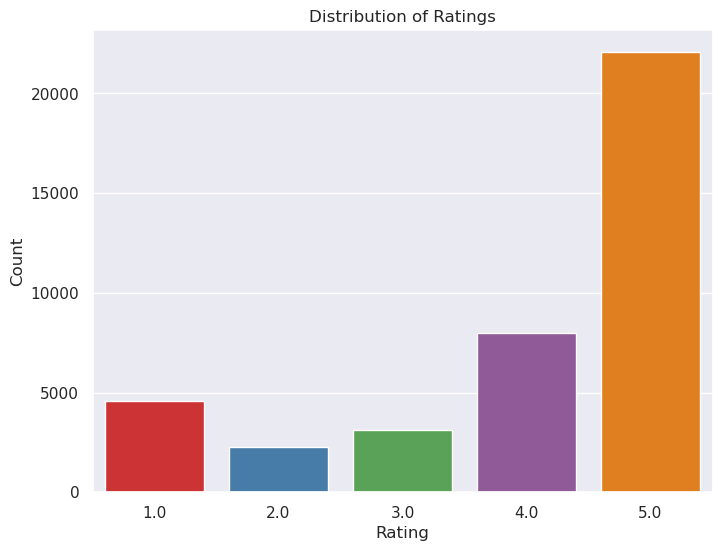

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=df['ratings'], palette="Set1")  # You can choose a palette for colors
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


In [14]:
average_ratings = df.groupby("product_id")["ratings"].mean().reset_index()
df = df.merge(average_ratings, on="product_id", suffixes=("", "_avg"))
df.rename(columns={"ratings_avg": "product_average_rating"}, inplace=True)


In [15]:
df.sample(10)

,user_id,product_id,ratings,timestamp,product_average_rating
28393,A36CC0SVCZ2M5P,B00001X5AL,4.0,1005004800,3.842105
1073,A3NL1YLHDPLZ0B,0972683275,5.0,1386547200,4.470980
15140,A1XP5DDWIHLH0Q,B00000JDF5,5.0,1350950400,4.574468
34513,A3G01RI3MUWWQ6,B00003CWDQ,2.0,1204070400,4.215278
11984,AVJRS32YAMTO6,B00000J3Q8,5.0,946944000,3.714286
8042,ATYDR87DEATVQ,B000001ON6,2.0,1401062400,3.881081
29937,A1C4YDZGWGH9FX,B0000226QJ,5.0,1010102400,4.360000
27989,A1K1AAZSD9KWX,B00001WRSJ,5.0,1349913600,4.609079
37938,A26322OYA05O91,B00004S5H5,5.0,1082851200,4.321429
5473,A2PDXKPW2ITJ1Y,9966287876,4.0,1379289600,4.000000


In [16]:
average_ratings_user = df.groupby("user_id")["ratings"].mean().reset_index()
df = df.merge(average_ratings_user, on="user_id", suffixes=("", "_avg"))
df.rename(columns={"ratings_avg": "user_average_rating"}, inplace=True)

In [17]:
df.sample(10)

,user_id,product_id,ratings,timestamp,product_average_rating,user_average_rating
4637,A3RUL1FLK6Q4BB,8918010656,5.0,1398643200,4.724138,5.0
21468,A3P668ITIZXYNG,B00001OPJZ,4.0,1215734400,3.988764,4.0
28730,AWC2TULPHF7XR,B00001WRSJ,5.0,1356652800,4.609079,5.0
25788,A1GK9OSEUJ20V0,B00001P584,5.0,1391126400,3.533333,5.0
21291,A2LA9AUI24V7BA,B00001OPJ1,5.0,947462400,4.387097,5.0
22365,A3S15YGZ6W6EV2,B00001P4XA,5.0,1151625600,3.832470,5.0
31866,A3DKDUNZG9VTMD,B00002EQCW,5.0,1375747200,4.626478,5.0
6039,A40HWVDFCZR80,9981724319,3.0,1287446400,2.000000,3.0
38831,A9QL0B1FXW9P,B00004SABB,3.0,1131494400,4.011650,3.0
32976,A28GPGQMR32W4Q,B00002SWUE,5.0,954460800,4.288462,5.0


# Splitting the dataset into training set and testing set 

In [18]:
from sklearn.model_selection import train_test_split
train_df , test_df = train_test_split(df[['user_id','product_id','ratings','product_average_rating','user_average_rating']],test_size=0.2,random_state=2)


In [19]:
train_df

,user_id,product_id,ratings,product_average_rating,user_average_rating
31392,A12VYWCG0OBMM9,B000026D8E,1.0,3.190476,1.0
6949,A1IU555GI9W7K3,9985542290,5.0,5.000000,5.0
8340,A1F0JF1OA9DO77,B00000DM9M,3.0,3.333333,3.0
21593,A2YSQ0ALSL41SZ,B00001OWYM,5.0,3.111538,5.0
13988,A272L6CJE7W0NY,B00000J4GC,5.0,4.500000,5.0
...,...,...,...,...,...
31019,A32WN34HA23YWH,B000023VQC,1.0,3.739130,1.0
30280,A3UBMWAQQZJBB3,B00001ZWXA,5.0,4.298193,5.0
6637,A1R6I0ZLP8M2C9,9984984745,1.0,1.666667,1.0
35343,A2FENPHM6UFT9E,B00003CWG4,5.0,3.970588,5.0


In [20]:
test_df

,user_id,product_id,ratings,product_average_rating,user_average_rating
2727,A2U220FGYF1D0M,140053271X,5.0,3.900232,5.000000
26907,AGA1ZY8WV3XC3,B00001W0DH,4.0,4.085890,4.000000
16283,A3O04WF9J04C6P,B00000JDF5,4.0,4.574468,4.000000
31845,A35WCRJL7ZO8MZ,B00002EQCW,5.0,4.626478,5.000000
19862,A3ERVE0AXYWQF6,B00000K1RT,5.0,3.000000,5.000000
...,...,...,...,...,...
8614,A3B9H6AUB1IRN2,B00000DM9W,1.0,4.593373,1.000000
14963,A2PQ99541JVPYL,B00000JBHE,5.0,4.925000,5.000000
12796,A238V1XTSK9NFE,B00000J3SA,5.0,4.466667,4.333333
5314,A3HN3M0B15MRN2,9862510447,3.0,3.777778,3.000000


# Converting Dataset in Surprise Library suitable format

In [21]:
from surprise import Dataset, Reader

In [22]:
reader = Reader(rating_scale=(1, 5))

In [23]:
data = Dataset.load_from_df(train_df[['product_id', 'user_id', 'ratings']], reader)

In [24]:
trainset = data.build_full_trainset() 

In [25]:
testset = list(zip(test_df.product_id.values, test_df.user_id.values, test_df.ratings.values))

In [26]:
from surprise import BaselineOnly

In [27]:
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100


def run_surprise(algo, trainset, testset, verbose=True): 
    
    train = dict()
    test = dict()
   
    algo.fit(trainset)
    
    train_preds = algo.test(trainset.build_testset())
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    train_rmse, train_mape = get_errors(train_preds)
    
    
    
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    test_preds = algo.test(testset)
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    test_rmse, test_mape = get_errors(test_preds)
    
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    return train, test

# Applying BaselineOnly

In [28]:
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)

Estimating biases using sgd...


In [29]:
bsl_test_results

{'rmse': 1.3113785480756548,
 'mape': 50.98369459017896,
 'predictions': array([3.92801333, 4.09199668, 4.54299342, ..., 4.18768149, 4.04399094,
        3.48745116])}

In [30]:
bsl_train_results

{'rmse': 1.2760859979139356,
 'mape': 49.93667674107246,
 'predictions': array([3.23496214, 3.31424133, 3.23498295, ..., 4.0512511 , 4.0512511 ,
        4.0512511 ])}

In [31]:
from surprise import KNNBaseline

# Applying KNN Baseline with user user similarity

In [32]:
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [33]:
knn_bsl_u_test_results

{'rmse': 1.2969726976057974,
 'mape': 49.66020693108983,
 'predictions': array([3.97721322, 4.10384824, 4.55241899, ..., 4.3861616 , 4.10310079,
        3.00048199])}

# Applying KNN Baseline with product product similarity

In [34]:
sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
bsl_options = {'method': 'sgd'}


knn_bsl_p = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_p_train_results, knn_bsl_p_test_results = run_surprise(knn_bsl_p, trainset, testset, verbose=True)


Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [35]:
knn_bsl_p_test_results

{'rmse': 1.2961882420108364,
 'mape': 49.68509562114108,
 'predictions': array([3.97721322, 4.10384824, 4.55241899, ..., 4.3861616 , 4.10310079,
        3.00048199])}

# Applying Matrix Factorisation using SVD

In [36]:
from surprise import SVD

In [37]:
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [38]:
svd_train_results

{'rmse': 0.8326450932433593,
 'mape': 31.451539786487842,
 'predictions': array([2.16019179, 4.2165492 , 2.21504237, ..., 4.33159984, 4.29819465,
        4.35825282])}

In [39]:
svd_test_results

{'rmse': 1.2977892898874428,
 'mape': 49.86180494460798,
 'predictions': array([3.9537663 , 4.11073544, 4.56298008, ..., 4.65900554, 4.08437357,
        3.02654586])}

# Preparing Dataset with all features to be passed to XG Boost

In [40]:
model_eval_test = pd.DataFrame()
model_eval_train = pd.DataFrame()

In [41]:
model_eval_train['product_avg_rating']=train_df['product_average_rating'].ravel()
model_eval_test['product_avg_rating']=test_df['product_average_rating'].ravel()

In [42]:
model_eval_train['user_avg_rating']=train_df['user_average_rating'].ravel()
model_eval_test['user_avg_rating']=test_df['user_average_rating'].ravel()

In [43]:
model_eval_test['knn_bsl_user']= pd.DataFrame(knn_bsl_u_test_results['predictions'])
model_eval_train['knn_bsl_user']= pd.DataFrame(knn_bsl_u_train_results['predictions'])

In [44]:
model_eval_test['knn_bsl_prod']= pd.DataFrame(knn_bsl_p_test_results['predictions'])
model_eval_train['knn_bsl_prod']= pd.DataFrame(knn_bsl_p_train_results['predictions'])

In [45]:
model_eval_train['bsl']=pd.DataFrame(bsl_train_results['predictions'])
model_eval_test['bsl']=pd.DataFrame(bsl_test_results['predictions'])

In [46]:
model_eval_train['svd']= pd.DataFrame(svd_train_results['predictions'])
model_eval_test['svd']= pd.DataFrame(svd_test_results['predictions'])

In [47]:
model_eval_train['ratings'] = train_df['ratings'].ravel()
model_eval_test['ratings'] = test_df['ratings'].ravel()

In [48]:
model_eval_train

,product_avg_rating,user_avg_rating,knn_bsl_user,knn_bsl_prod,bsl,svd,ratings
0,3.190476,1.0,1.0,1.0,3.234962,2.160192,1.0
1,5.000000,5.0,5.0,5.0,3.314241,4.216549,5.0
2,3.333333,3.0,1.0,1.0,3.234983,2.215042,3.0
3,3.111538,5.0,4.0,4.0,3.294455,3.550955,5.0
4,4.500000,5.0,5.0,5.0,3.314253,4.125054,5.0
...,...,...,...,...,...,...,...
31995,3.739130,1.0,5.0,5.0,4.051251,4.321727,1.0
31996,4.298193,5.0,3.0,3.0,3.972768,3.851735,5.0
31997,1.666667,1.0,5.0,5.0,4.051251,4.331600,1.0
31998,3.970588,5.0,5.0,5.0,4.051251,4.298195,5.0


In [49]:
model_eval_test

,product_avg_rating,user_avg_rating,knn_bsl_user,knn_bsl_prod,bsl,svd,ratings
0,3.900232,5.000000,3.977213,3.977213,3.928013,3.953766,5.0
1,4.085890,4.000000,4.103848,4.103848,4.091997,4.110735,4.0
2,4.574468,4.000000,4.552419,4.552419,4.542993,4.562980,4.0
3,4.626478,5.000000,4.599934,4.599934,4.598528,4.594925,5.0
4,3.000000,5.000000,3.425780,3.425780,3.861511,3.468954,5.0
...,...,...,...,...,...,...,...
7995,4.593373,1.000000,4.610534,4.610534,4.616702,4.614775,1.0
7996,4.925000,5.000000,4.899556,4.899556,4.478584,4.866953,5.0
7997,4.466667,4.333333,4.386162,4.386162,4.187681,4.659006,5.0
7998,3.777778,3.000000,4.103101,4.103101,4.043991,4.084374,3.0


In [50]:
model_eval_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_avg_rating  8000 non-null   float64
 1   user_avg_rating     8000 non-null   float64
 2   knn_bsl_user        8000 non-null   float64
 3   knn_bsl_prod        8000 non-null   float64
 4   bsl                 8000 non-null   float64
 5   svd                 8000 non-null   float64
 6   ratings             8000 non-null   float64
dtypes: float64(7)
memory usage: 437.6 KB


# Applying XG Boost ensembling technique

In [51]:
import xgboost as xgb

In [52]:
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape


def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
   
    train_results = dict()
    test_results = dict()
    
    
    algo.fit(x_train, y_train, eval_metric = 'rmse')
   
    
    y_train_pred = algo.predict(x_train)
    
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
  
    
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    
    return train_results, test_results

In [53]:
x_train = model_eval_train[['user_avg_rating','product_avg_rating','knn_bsl_user','knn_bsl_prod','bsl','svd']]
y_train = model_eval_train['ratings']

x_test = model_eval_test[['user_avg_rating','product_avg_rating','knn_bsl_user','knn_bsl_prod','bsl','svd']]
y_test = model_eval_test['ratings']



xgb_final = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)



/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


# Final errors

In [54]:
test_results

{'rmse': 0.2536941712403907,
 'mape': 2.873999112745126,
 'predictions': array([4.9980707, 4.0179625, 3.9985642, ..., 4.733494 , 2.9929569,
        5.013036 ], dtype=float32)}

In [55]:
train_results

{'rmse': 0.17303481648623276,
 'mape': 1.842410591840744,
 'predictions': array([0.9618561, 5.0063434, 3.0083864, ..., 1.0004319, 5.00221  ,
        4.0070434], dtype=float32)}

# Let's Recommend

In [56]:
import heapq

In [60]:
def recommend(user_id):
    products_available = set(df['product_id'].unique()) - set(df.loc[df['user_id']==user_id,'product_id'].values)
    
    testset = [(user_id, product_id, 0) for product_id in products_available ]


    predictions = svd.test(testset)


    top_rated_products = heapq.nlargest(10, predictions, key=lambda x: x.est)


    print("Top 10 Rated Products in Ranked Order:")
    for rank, prediction in enumerate(top_rated_products, start=1):
        print(f"Rank {rank}: Product ID {prediction.iid}")
        

In [61]:
recommend('AGA1ZY8WV3XC3')

Top 10 Rated Products in Ranked Order:
Rank 1: Product ID B00000K0JM
Rank 2: Product ID 9967310847
Rank 3: Product ID 9985580443
Rank 4: Product ID 9985513177
Rank 5: Product ID 9985731603
Rank 6: Product ID 9985745442
Rank 7: Product ID B00004S7NQ
Rank 8: Product ID B000023VUD
Rank 9: Product ID 998940660X
Rank 10: Product ID B00000JBUS
